In [1]:
import pandas as pd

In [2]:
original_data = pd.read_csv('data/may_conversation_data.csv')
generated_data = pd.read_json('data/may_conversation_data_processed_with_prob.jsonl', lines=True)

Text(0.85, 50, '0.467')

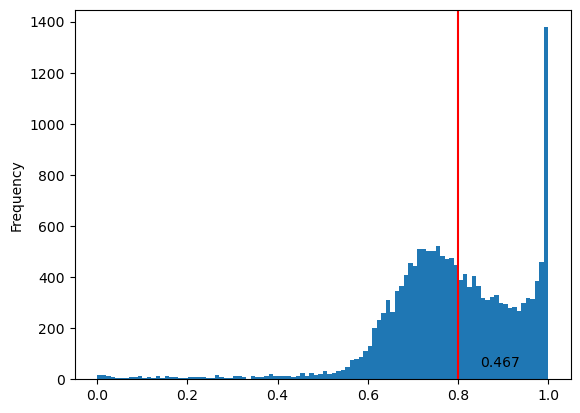

In [12]:
# plot the dist of data['do_search_prob']
generated_data['do_search_prob'].plot.hist(bins=100)

# add a vertical line to show the threshold
import matplotlib.pyplot as plt
plt.axvline(x=0.8, color='red')

# add text to the plot, to show the percentage of data points above the threshold
plt.text(0.85, 50, round(generated_data[generated_data['do_search_prob'] > 0.8].shape[0] / generated_data.shape[0], 3))

In [3]:
len(original_data), len(generated_data)

(35050, 16678)

In [4]:
generated_data
# turn_id_map is the mapping from ['turn_id'] to ['do_search_prob'] for generated data
turn_id_map = generated_data[['turn_id', 'do_search_prob']].set_index('turn_id').to_dict()['do_search_prob']
turn_id_map 

{'22f3de75-35a7-435d-b450-58a3bdc82620': 0.8257286549,
 'c5127624-5b89-4eab-bb06-0fb0a1f9f9ab': 0.8185970783000001,
 'c1990a1a-348d-43db-a8d3-a4c196aec920': 0.9907859564,
 'ff0e24ff-bf22-4e72-80cb-ad7fb27ee9de': 0.7006417513000001,
 '91db0afc-155b-4b13-bffd-31f86a73d77e': 0.4039158523,
 '420c8c47-adef-442f-b9b3-7216b92f17f9': 0.9370137453,
 '79d98393-1718-42db-a8d3-873f0eadf56b': 0.8148952127,
 'e0f2f794-502e-4d49-939e-deca83c6447e': 0.9968695045,
 'ef8de4d2-514a-4c56-b9be-6f16448b10d7': 0.9491147995,
 'f36feca8-e652-4d15-9a00-dbe4cee0ca2a': 0.9080501199000001,
 'aa7d7911-83d5-4dca-a2b4-931545d40d4f': 0.9908084273000001,
 '31aa01eb-9014-495e-8d37-dc7eaef9410f': 0.7756277323,
 'b8c157f0-88df-425f-aa56-8c85290ceb8e': 0.8217710257,
 'e9108cd7-a9c4-491e-b843-eaccf38a4669': 0.9693078399,
 '98698179-b818-4173-9cb6-e012561b06cb': 0.9956235290000001,
 'b20ec674-69fa-4a64-ba88-8831badf069a': 0.9973071814000001,
 'ae59800f-2f84-4e81-ab46-efb9ec41d5d5': 0.7552647591,
 '8c71b9f5-22f0-43b3-8b1c-6e8

In [5]:
original_data['do_search_prob'] = original_data['turn_id'].map(turn_id_map)
original_data['do_search_prob'] = original_data['do_search_prob'].fillna(0)
original_data['do_search_decision'] = original_data['do_search_prob'].apply(lambda x: True if (x > 0.85) or (x == 0) else False)
original_data['do_search_prob'] = original_data['do_search_prob'].apply(lambda x: 'Conversations with less than 2 turns will always generate queries' if x == 0 else x)

In [14]:
# original_data[original_data['do_search_prob'] != 'Conversations with less than 2 turns will always generate queries']['do_search_decision'].value_counts()
original_data['do_search_decision'].value_counts()

True     24279
False    10771
Name: do_search_decision, dtype: int64

In [15]:
original_data.to_json('data/may_conversation_result.jsonl', orient='records', lines=True)

In [61]:
# check the current one is different from last one as string
original_data['conversation_id'].iloc[300:340]

300    02347b1730422c56a9d93e898e2d68786ce6f890c44e04...
301    02347b1730422c56a9d93e898e2d68786ce6f890c44e04...
302    02347b1730422c56a9d93e898e2d68786ce6f890c44e04...
303    02347b1730422c56a9d93e898e2d68786ce6f890c44e04...
304    02347b1730422c56a9d93e898e2d68786ce6f890c44e04...
305    02384ada83ffbf14dda98a5a54e8cb83b6c8ccdd69add9...
306    023a5f0f12b6c3eafd9ab22c1b6b198432fa79e719a95b...
307    023f56e003e18968d5cb5c62741139b4cbf081932ce2e7...
308    0244ee6da72fdd1f6ab612d79d3581d2461fe9d9a70e7c...
309    0247e9c07417b658aee3d1ca012fe90f8c58d3f10204e4...
310    0247e9c07417b658aee3d1ca012fe90f8c58d3f10204e4...
311    02558c2e7901dd45ae16d726169099116c061f081b082f...
312    02558c2e7901dd45ae16d726169099116c061f081b082f...
313    02558c2e7901dd45ae16d726169099116c061f081b082f...
314    025636340fb26a16a1b81af69ad0820ee4f4a34084acb6...
315    025e65ebc827827cc8c49f4535a6ad7b986f9d9e294147...
316    025e65ebc827827cc8c49f4535a6ad7b986f9d9e294147...
317    02601ff6648ad5167dab4192

In [26]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [58]:
generated_data['last_utterance'] = generated_data['flattened'].apply(lambda x: x.split('\n')[-1])
generated_data[generated_data['turn_id'] == '7b4983c6-198f-4d59-b64a-e9054f9c7788'][['last_utterance', 'do_search_prob']]

,last_utterance,do_search_prob


In [64]:
for i in range(319, 329, 1):
    print(color.BOLD + "user:" + color.END, original_data['user_prompt'].iloc[i])
    print(color.BOLD + "do search prob:" + color.END, original_data['do_search_prob'].iloc[i])
    print(color.BOLD + "do search decision:" + color.END, original_data['do_search_decision'].iloc[i])
    print(color.BOLD + "bot:" + color.END, original_data['bot_response'].iloc[i])
    print(color.BOLD + "turn id:" + color.END, original_data['turn_id'].iloc[i])
    print()

user: yes
do search prob: Conversations with less than 2 turns will always generate queries
do search decision: True
bot: It's good to hear that you recognize the importance of taking time for yourself and seeking professional help, have you considered any specific steps you can take to prioritize your healing process?
turn id: 4345ec3f-8baf-43a1-b1f1-7f4ecbf67720

user: no
do search prob: Conversations with less than 2 turns will always generate queries
do search decision: True
bot: Having friends who can empathize with you is important. By the way, do you know how old user1 and user2 are?
turn id: d2f41620-b1de-4a2f-bcd2-a51f70ebaf94

user: pieces
do search prob: 0.7564936876
do search decision: False
bot: We can talk about books, movies, music, and more! What would you like to talk about?
turn id: 7ed941b7-7ba3-4e68-8e3f-67929bf39c13

user: alexa how about poop poop made out of ice cream
do search prob: 0.8824015856
do search decision: True
bot: Did you know that the first Academy A